**Project Title:**
Customer Segmentation for a Retail Store

**Type :**
Customer Segmentation

**Techniques Used :**
K-Means, Elbow Method

**Dataset Source :**
Mall Customers Dataset
(Kaggle)

# **Project Name :**
Mall Customer Dataset

# Overview

The Mall Customers Dataset provides data on 200 individuals who visit a mall, including demographic information, annual income, and spending habits. This dataset is useful for exploratory data analysis, customer segmentation, and clustering tasks (e.g., K-means clustering).

# Columns Description

**CustomerID:** A unique identifier for each customer (integer).
**Genre:** The gender of the customer (Male/Female).
**Age:** The age of the customer (integer).
**Annual Income (k$):** Annual income of the customer in thousands of dollars (integer).
**Spending Score (1-100):** A score assigned by the mall based on customer behavior and spending patterns (integer).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/GNCIPL_AI_ML/Mall_Customers.csv'
df = pd.read_csv(path)
display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## ***Data Cleaning***

## check for Missing values

In [8]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### Check for duplicate rows

In [9]:
duplicate_rows = df.duplicated().sum()

In [10]:
df.drop_duplicates(inplace=True)

### Identify Categorical and Numerical Columns

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

print(f"Categorical Features: {list(categorical_cols)}")
print(f"Numerical Features: {list(numerical_cols)}")

Categorical Features: ['Genre']
Numerical Features: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


### Categorical Features  value count

In [12]:
df[categorical_cols].value_counts()


,count
Genre,
Female,112
Male,88


### Numerical features value counts

In [13]:
df['Age'].value_counts()


,count
Age,
32,11
35,9
31,8
19,8
30,7
49,7
23,6
40,6
36,6


In [14]:
df['Annual Income (k$)'].value_counts()


,count
Annual Income (k$),
54,12
78,12
60,6
48,6
63,6
...,...
101,2
113,2
120,2


In [15]:
df['Spending Score (1-100)'].value_counts()

,count
Spending Score (1-100),
42,8
55,7
73,6
46,6
48,5
...,...
68,1
85,1
23,1


## *Preprocessing*

In [16]:

# using label encoder to covert into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [17]:
df['Genre'].value_counts()

,count
Genre,
0,112
1,88


## ***Check Outliers***

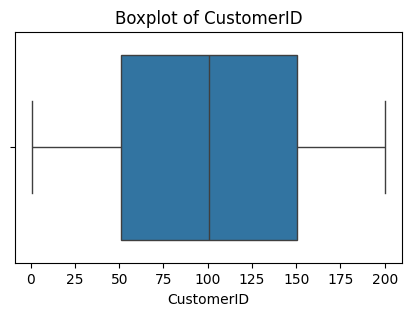

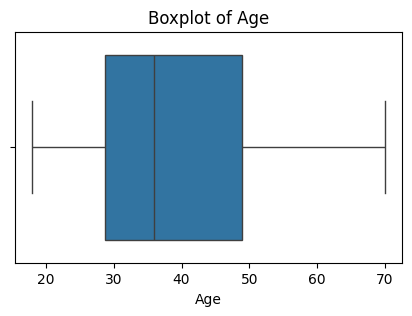

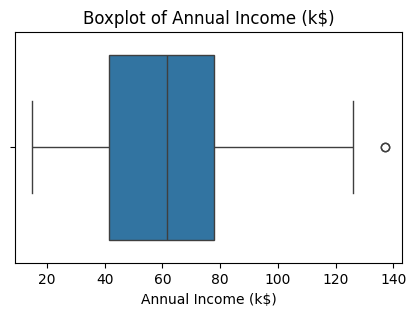

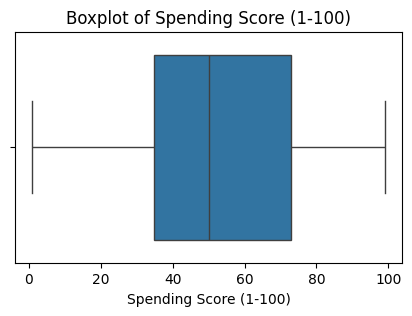

In [18]:
for col in numerical_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [19]:
numerical_cols = ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col} → Outliers count:", len(outliers))


Genre → Outliers count: 0
Age → Outliers count: 0
Annual Income (k$) → Outliers count: 2
Spending Score (1-100) → Outliers count: 0


In [20]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

     # Remove outliers
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]



    print(f"{col} → Outliers count:", len(outliers))

df.shape


Genre → Outliers count: 0
Age → Outliers count: 0
Annual Income (k$) → Outliers count: 0
Spending Score (1-100) → Outliers count: 0


(198, 5)

## ***Feature Engineering***

In [21]:
# add new columns age group
def age_group(age):
    if age < 20:
        return 'Teen'
    elif age < 35:
        return 'Young Adult'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)



In [22]:
def income_level(income):
    if income < 30:
        return 'Low Income'
    elif income < 60:
        return 'Middle Income'
    else:
        return 'High Income'

df['Income_Level'] = df['Annual Income (k$)'].apply(income_level)


In [23]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age_Group', 'Income_Level'],
      dtype='object')

# EDA

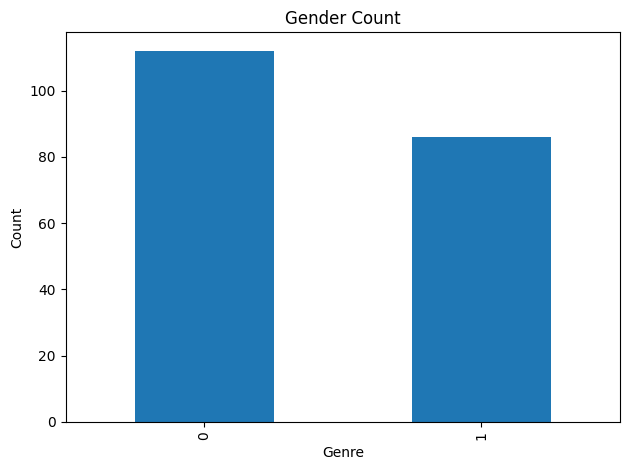

In [24]:
df['Genre'].value_counts().plot(kind='bar')
plt.title("Gender Count")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

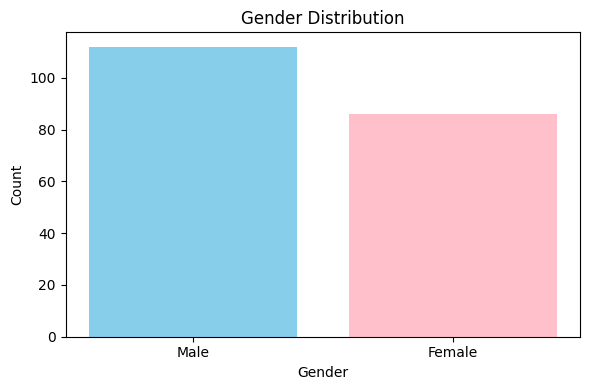

In [25]:
labels = ['Male', 'Female']
colors = ['skyblue', 'pink']
gender_counts = df['Genre'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(labels,gender_counts, color=colors)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()


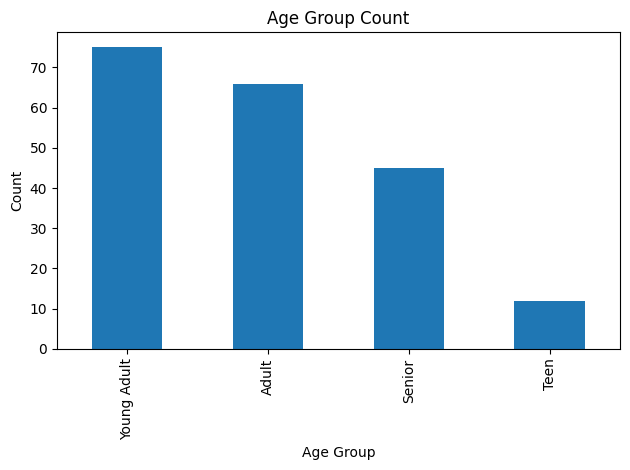

In [26]:
df['Age_Group'].value_counts().plot(kind='bar')
plt.title("Age Group Count")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()

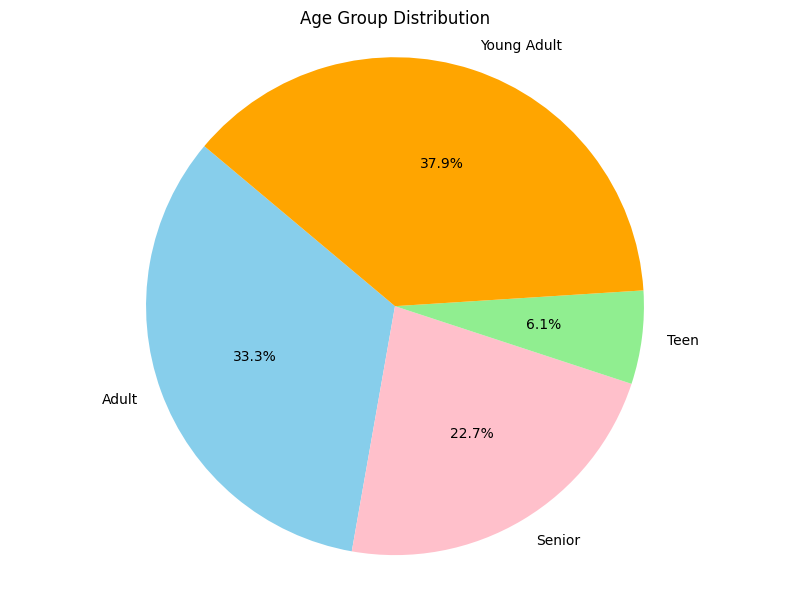

In [27]:
# pie chart of age
age_counts = df['Age_Group'].value_counts().sort_index()
labels = age_counts.index
colors = ['skyblue', 'pink', 'lightgreen', 'orange']

plt.figure(figsize=(8,6))
plt.pie(age_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Age Group Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

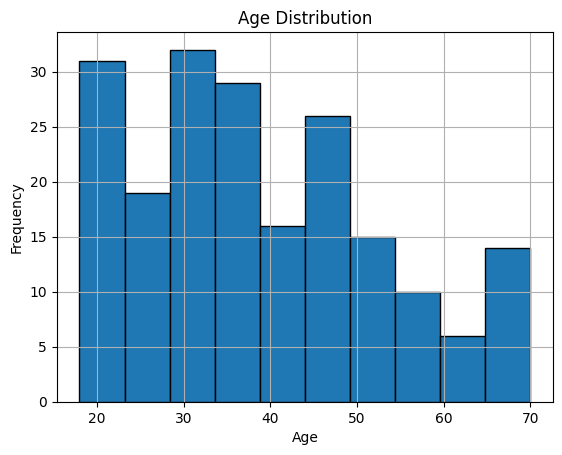

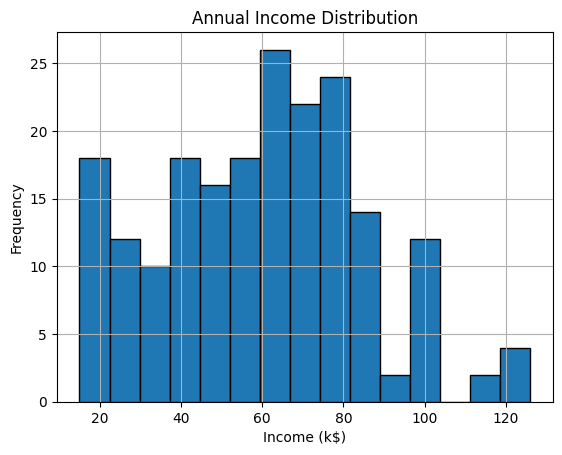

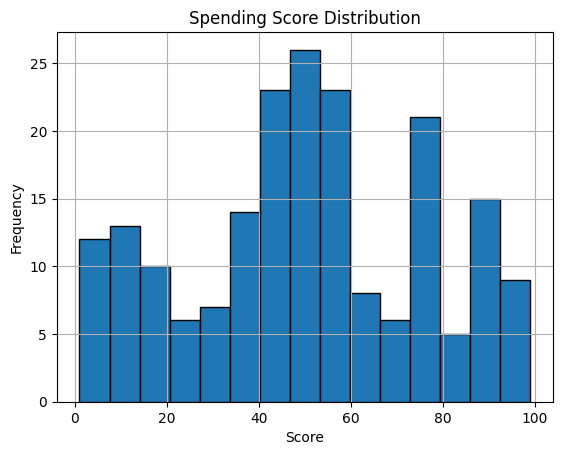

In [28]:
df['Age'].hist(edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

df['Annual Income (k$)'].hist(bins=15, edgecolor='black')
plt.title("Annual Income Distribution")
plt.xlabel("Income (k$)")
plt.ylabel("Frequency")
plt.show()

df['Spending Score (1-100)'].hist(bins=15, edgecolor='black')
plt.title("Spending Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

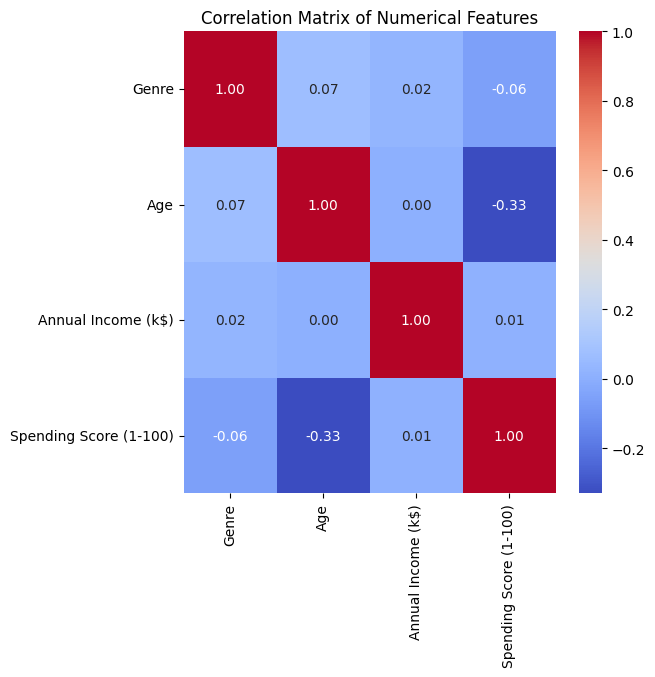

In [29]:
plt.figure(figsize=(6, 6))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

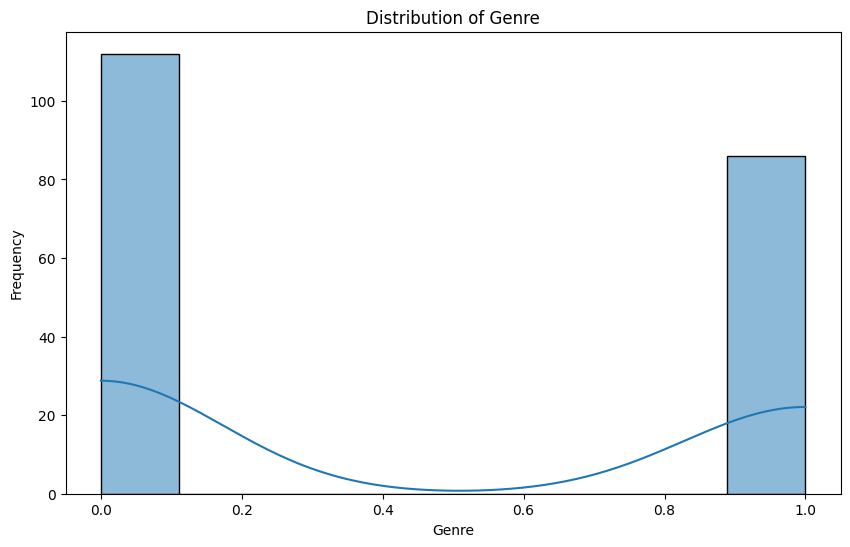

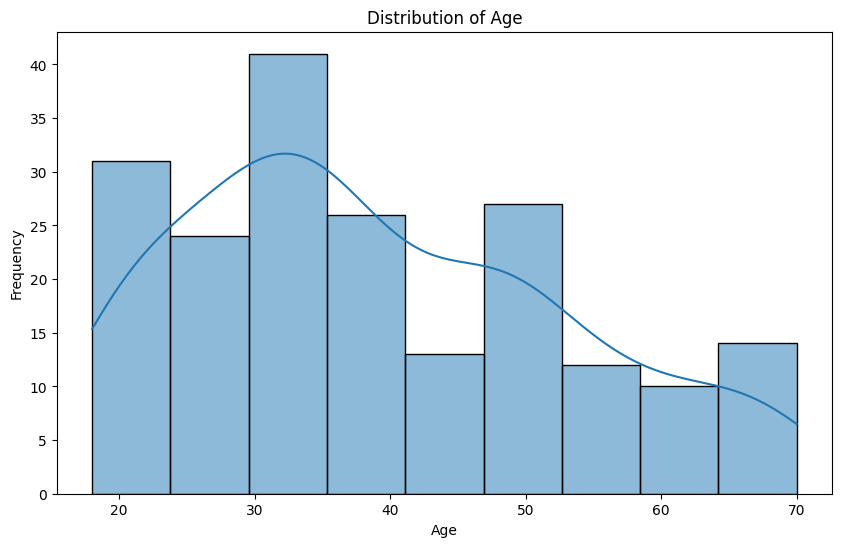

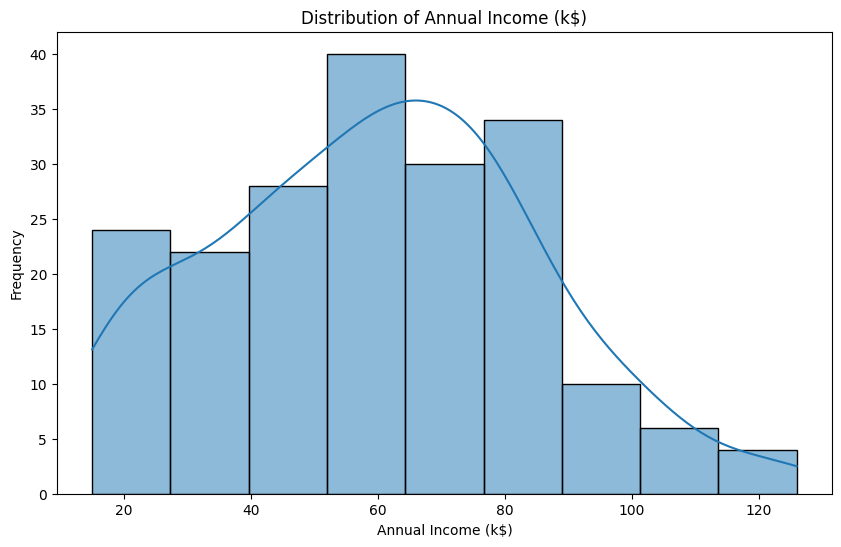

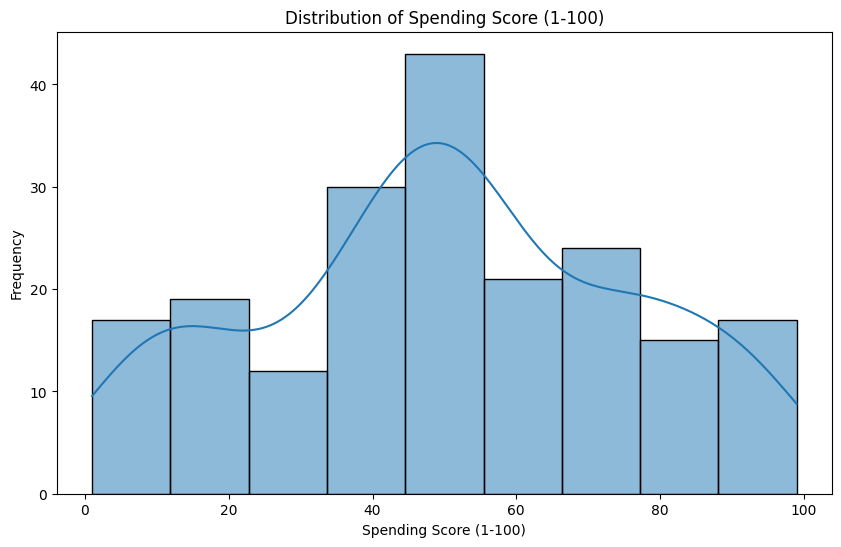

In [30]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Count Plot of Categorical Features (Genre)

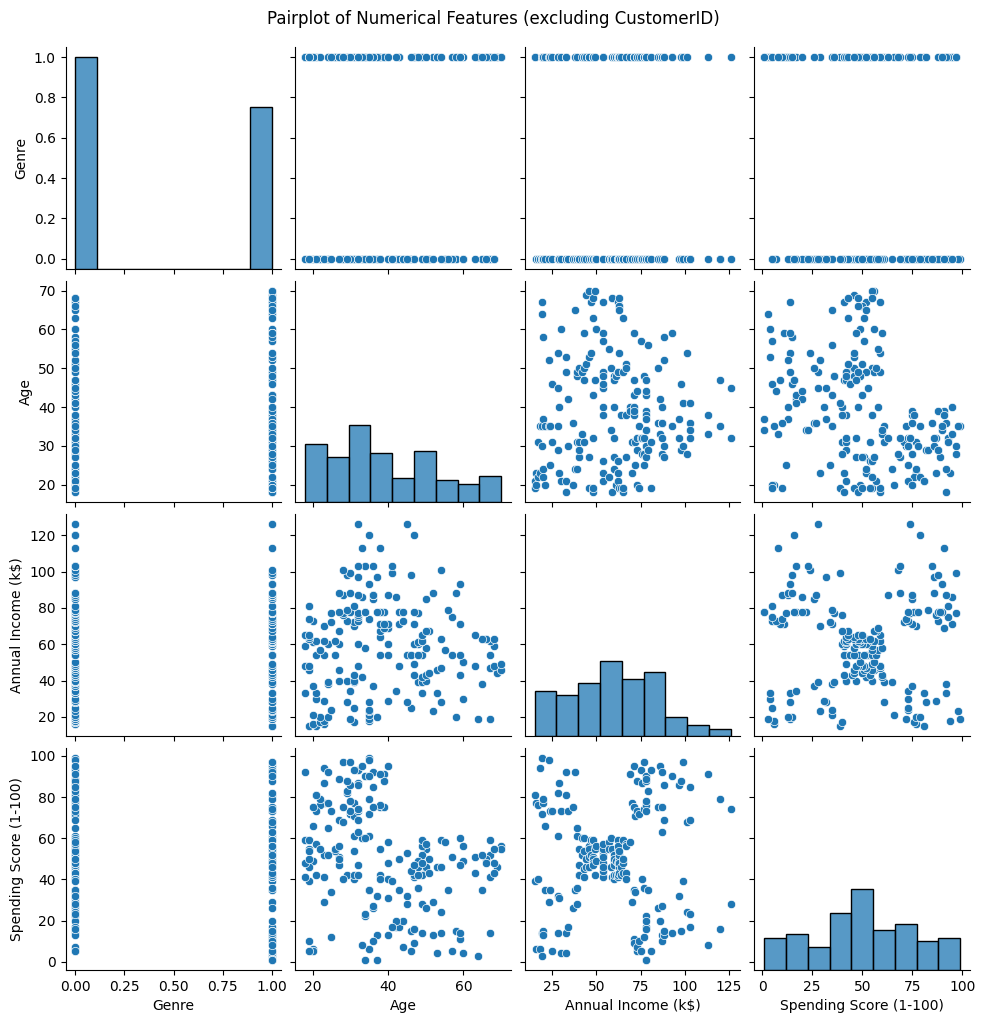

In [31]:
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Features (excluding CustomerID)', y=1.02)
plt.show()

## K-Means

In [32]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(X)

# Add cluster labels to dataset
df['Cluster'] = kmeans.labels_



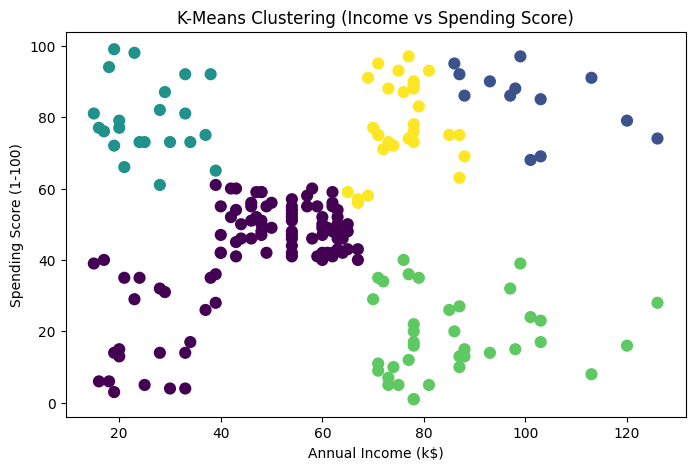

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            c=df['Cluster'],s=60)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering (Income vs Spending Score)")

plt.show()


In [34]:
centroids = kmeans.cluster_centers_
print("Cluster Centers:\n", centroids)


Cluster Centers:
 [[ 47.39175258  42.81443299]
 [101.07692308  84.61538462]
 [ 25.72727273  79.36363636]
 [ 85.64864865  18.64864865]
 [ 75.5862069   77.5862069 ]]


# using elbow method

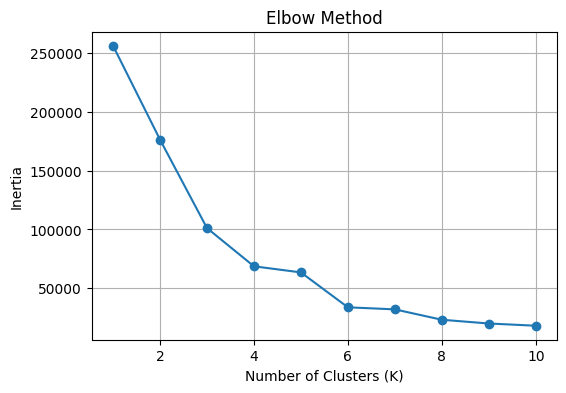

In [35]:
from sklearn.cluster import KMeans

# Choose range of clusters
inertia_values = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X)
    inertia_values.append(km.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [36]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X)

sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.540179791500928


In [37]:
from sklearn.metrics import davies_bouldin_score

print("Davies-Bouldin Score:", davies_bouldin_score(X, labels))

Davies-Bouldin Score: 0.6611472344279302


In [38]:
from sklearn.cluster import AgglomerativeClustering

# Instantiate AgglomerativeClustering with 5 clusters
hac = AgglomerativeClustering(n_clusters=5)

# Fit the model and get cluster labels
df['Agglomerative_Cluster'] = hac.fit_predict(X)

# Display the first few rows with the new cluster column
display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_Level,Cluster,Agglomerative_Cluster
0,1,1,19,15,39,Teen,Low Income,0,4
1,2,1,21,15,81,Young Adult,Low Income,2,3
2,3,0,20,16,6,Young Adult,Low Income,0,4
3,4,0,23,16,77,Young Adult,Low Income,2,3
4,5,0,31,17,40,Young Adult,Low Income,0,4


In [39]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for Agglomerative Clustering
sil_score_agg = silhouette_score(X, df['Agglomerative_Cluster'])
print("Silhouette Score for Agglomerative Clustering:", sil_score_agg)

Silhouette Score for Agglomerative Clustering: 0.5593054601700206


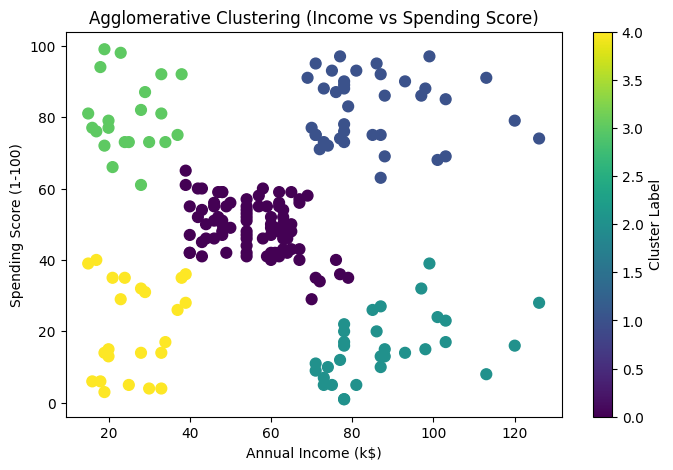

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            c=df['Agglomerative_Cluster'],
            cmap='viridis', s=60)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Agglomerative Clustering (Income vs Spending Score)")
plt.colorbar(label='Cluster Label')
plt.show()